# Part I -  Exploratory Analysis of Loan Data from Prosper
## by Joshua Uduehi

## Introduction

This dataset is about different loans from Prosper, collected by Udacity. The dataset can be found here: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv. The variable dictionary can be found here: https://video.udacity-data.com/topher/2023/December/6571fe24_prosper-loan-data-variable-definitions/prosper-loan-data-variable-definitions.xlsx. Records in this dataset deal with loans and various attributes associated with the loans. Questions that I want to answer in this dataset are about loan information, borrower information, and lender information.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load CSV file into a dataframe
df = pd.read_csv('prosperLoanData.csv')

### What is the structure of your dataset?

This dataset has 113,937 rows and 81 columns. There are 81 features in total available to examine in this dataset about loans.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are *MonthlyLoanPayment* and *ProsperRating (numeric)*.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are several features that will support the investigation into the features of interest. List below are the features I would like to include in a subset of the original dataset:
*BorrowerAPR, CurrentCreditLines, IsBorrowerHomeowner, CreditScoreRangeUpper, CreditScoreRangeLower, BankcardUtilization, LoanOriginalAmount, LenderYield, CreditGrade*, and *TotalInquiries.*

In [3]:
#list features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Univariate Exploration

> What is the distribution of MonthlyLoanPayment?

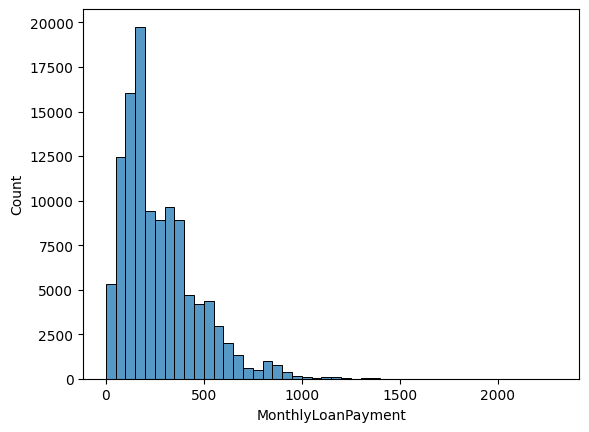

In [7]:
#histogram of MonthlyLoanPayment
bins = np.arange(0, df['MonthlyLoanPayment'].max()+50, 50)
sns.histplot(data=df, x='MonthlyLoanPayment',bins=bins);

> What is the count of ProsperRating (numeric)?

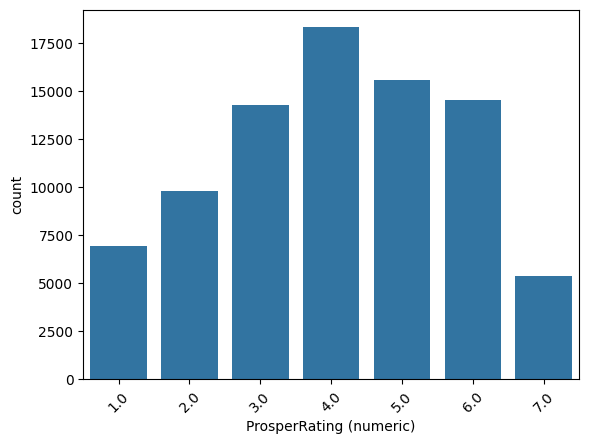

In [5]:
#bar chart of ProsperRating (numeric)
base_color = sns.color_palette()[0]

sns.countplot(data=df, x='ProsperRating (numeric)', color=base_color);
plt.xticks(rotation=45);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

When investigating the MonthlyLoanPayment and ProsperRating (numeric) variables, there was no need to perform any transformations. The distribution of the MonthlyLoanPaymente shows that among the collection of loan payments in the data, it appears unimodal between the values of around $200 in monthly payments. The distribution of the ProsperRating (numeric) variable shows that the most common rating was 4.0.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Of the two features examined, I did notice a somewhat unusual distributions for MonthlyLoanPayment. There is a steep incline from 0 to 200 for MonthlyLoanPayment, followed by a steep decline afterwards and somewhat smooth decline shortly after.

## Bivariate Exploration

> What is the relationship between ProsperRating (numeric) and TotalInquiries?

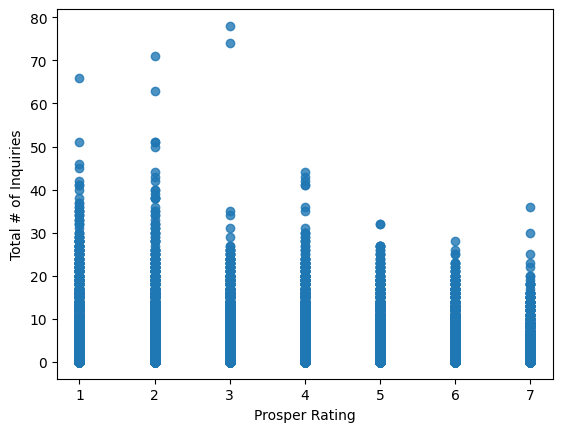

In [6]:
#scatter plot of ProsperRating (numeric) and TotalInquiries
sns.regplot(data=df, x='ProsperRating (numeric)', y='TotalInquiries',fit_reg=False)
plt.xlabel('Prosper Rating')
plt.ylabel('Total # of Inquiries');

> What is the relationship between MonthlyLoanPayment and CreditGrade?

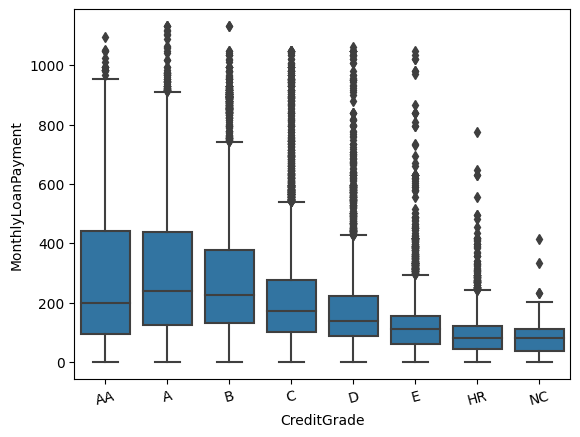

In [7]:
#box plot of MonthlyLoanPayment and CreditGrade
credit_types = ['AA', 'A', 'B', 'C', 'D','E','HR','NC']

# Returns the types for credit_types with the categories and orderedness
credit_classes = pd.CategoricalDtype(ordered=True, categories=credit_types)

# Use pandas.astype() to convert the "CreditGrade" column from a plain object type into an ordered categorical type 
df['CreditGrade'] = df['CreditGrade'].astype(credit_classes);

ax1 = sns.boxplot(data=df, x='CreditGrade', y='MonthlyLoanPayment', color='tab:blue')
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim());

> What is the relationship between LoanOriginalAmount and LenderYield?

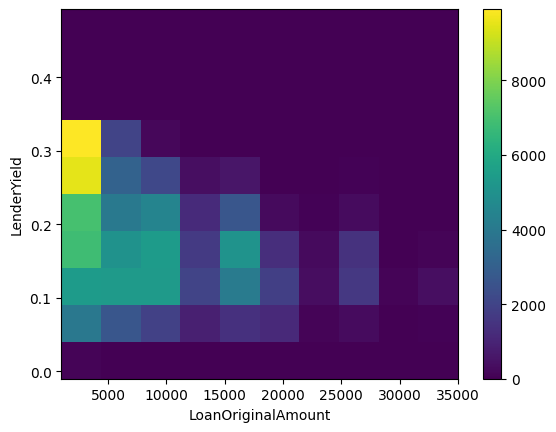

In [8]:
#heat map of LoanOriginalAmount and LenderYield
heatmap_subset = df[['LoanOriginalAmount', 'LenderYield']]
heatmap_subset = heatmap_subset.dropna()

plt.hist2d(data=heatmap_subset, x='LoanOriginalAmount', y='LenderYield')
plt.colorbar()
plt.xlabel('LoanOriginalAmount')
plt.ylabel('LenderYield');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

One interesting relationship was between MonthlyLoanPayments and CreditGrade. Although there is a slight uptick in the median for MonthlyLoanPayments from AA to A, the general trend among median values for CreditGrade is downward after A. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

An interesting relationship I observed was between LoanOriginalAmount and LenderYield. The heat map shows that the lower the original loan amount, the higher the lender yield.

## Multivariate Exploration

> What is the relationship among IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, and BankcardUtilization?

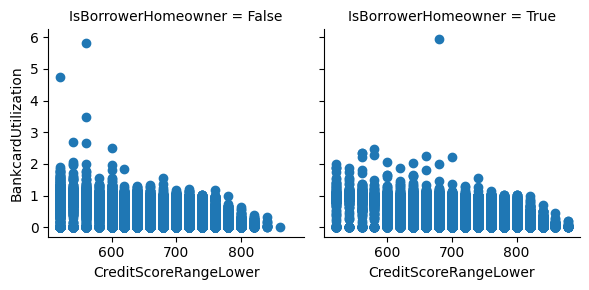

In [9]:
#Facet plot of IsBorrowerHomeowner, CreditScoreRangeLower, BankcardUtilization
g = sns.FacetGrid(data=df, col='IsBorrowerHomeowner', margin_titles=True)
g.map(plt.scatter, 'CreditScoreRangeLower','BankcardUtilization');

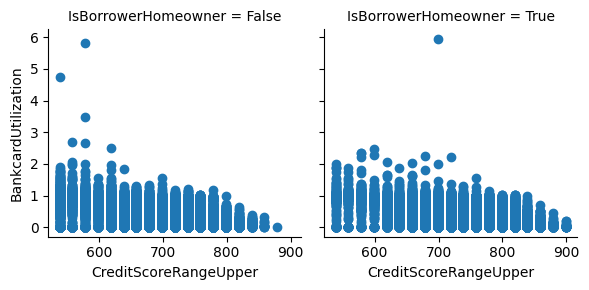

In [10]:
#Facet plot of IsBorrowerHomeowner, CreditScoreRangeUpper, BankcardUtilization
g = sns.FacetGrid(data=df, col='IsBorrowerHomeowner', margin_titles=True)
g.map(plt.scatter, 'CreditScoreRangeUpper','BankcardUtilization');

> What is the relationship among BorrowerAPR, CurrentCreditLines, and MonthlyLoanPayment?

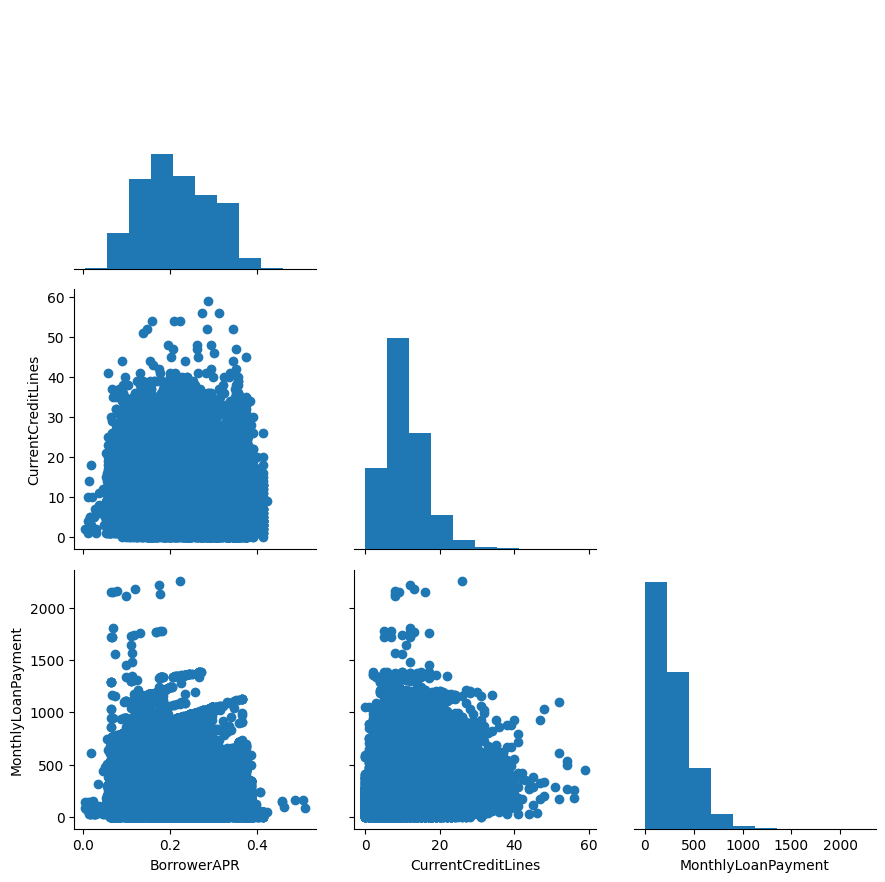

In [11]:
#Plot matrix of BorrowerAPR, CurrentCreditLines, MonthlyLoanPayment
g = sns.PairGrid(data=df, 
                 vars=['BorrowerAPR', 'CurrentCreditLines', 'MonthlyLoanPayment'],
                 height=3,
                 corner=True,
                 dropna=True,
                )
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The features I think that strengthened in each other in terms of looking at those I was interested in were the CurrentCreditLines and BorrowerAPR from the plot matrix. Both of these features appear to be strongly, positively correlated with MonthlyLoanPayment. Additionally, BorrowerAPR and CurrentCreditLines seem to be positively correlated with each other as well.

### Were there any interesting or surprising interactions between features?

Another interesting interaction was among CreditScoreRangeLower, CreditScoreRangeUpper, BankcardUtilization, and IsBorrowerHomeowner from the facet plot. While there were outliers for both homeowners and non-homeowners in the dataset, there was a difference in bank card utilization. The lower and upper range of credit scores showed that homeowners generally had less bank card utilizations that non-homeowners. Additionally, homeowners showed a higher credit scores for CreditScoreRangeLower and CreditScoreRangeUpper than non-homeowners.

## Conclusions

There are some key takeaways from the data examined in this exploration. From the univariate analysis of the dataset, it appears that MonthlyLoanPayments are around the median value of monthly loan payments and most ProsperRating values are around the middle at 4 out of 7. From the bivariate analysis of the dataset, CreditGrade values arranged in order can correlate with lower loan payments per month, as well as a general trend in lower amount of inquiries per loan. From the multivariate analysis, homeowners have a higher credit score with a lower bank card utilization, while current credit lines and APR of a borrower are somewhat positively correlated, along with a slight more spread out distribution for MonthlyLoanPayments with CurrentCreditLines and MonthlyLoanPayments with BorrowerAPR.